# GWP Submission #3 

# Question 1

In [42]:
# Libraries
import numpy as np
import pandas as pd
import math
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import random
import scipy.optimize
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import log,exp,sqrt,stats 
from random import gauss
import scipy as sp

In [2]:
# NOT REQUIRED - GWP 1 reference
#Function to Calculate Up and Out Price
def CallUO(S,K,r,sig,Time,cur_time,b,H,R):
    # S: Currentprice, K: Strike, r: Riskfree rate, sig: volatility, Time: Time to Maturity, cur_time= currentTime
    # b : Cost to Carry, H: Barrier Level, R: value upon expiration
    #settingd for up-and-out
    eta=-1
    phi=1
    T=Time-cur_time
    mu=(b-(sig**2 / 2))/sig**2
    lam= math.sqrt(mu**2 + (2*r)/(sig**2))
    x1 = (math.log(S/K)) / (sig*math.sqrt(T)) + (1+mu)*sig*math.sqrt(T)
    x2 = (math.log(S/H)) / (sig*math.sqrt(T)) + (1+mu)*sig*math.sqrt(T)
    y1 = math.log((H**2)/(S*K)) / (sig*math.sqrt(T)) + (1+mu)*sig*math.sqrt(T)
    y2 = math.log(H/S) / (sig*math.sqrt(T)) + (1+mu)*sig*math.sqrt(T)
    z = math.log(H/S) / (sig*math.sqrt(T)) + lam*sig*math.sqrt(T)
    N1=phi*x1-phi*sig*math.sqrt(T)
    N2=phi*x2-phi*sig*math.sqrt(T)
    N3= eta*y1- eta*sig*math.sqrt(T)
    N4= eta*y2- eta*sig*math.sqrt(T)
    N5=eta*z-2*eta*lam*sig*math.sqrt(T)
    A=phi*S*math.exp((b-r)*T)*norm.cdf(phi*x1) - phi*K*math.exp(-r*T)*norm.cdf(N1)
    B=phi*S*math.exp((b-r)*T)*norm.cdf(phi*x2) - phi*K*math.exp(-r*T)*norm.cdf(N2)
    C=phi*S*math.exp((b-r)*T)*((H/S)**(2*(mu+1)))*norm.cdf(eta*y1)- phi*K*math.exp(-r*T)*((H/S)**(2*mu))*norm.cdf(N3)
    D=phi*S*math.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)- phi*K*math.exp(-r*T)*((H/S)**(2*mu))*norm.cdf(N4)
    F=R*(((H/S)**(mu+lam))*norm.cdf(eta*z)-((H/S)**(mu-lam))*norm.cdf(N5))
    if K<H:
        return round(A-B+C-D+F,3)
    else:
        return round(F,3)


In [3]:
class Option():
    def __init__(self, S=100, Sf=200, K = 100,v0 = 200, r = 0.08, sig = 0.3,Time = 1,cur_time = 0,
                b = 0.08, H = 150, R = 0, N = 12, Debt=175,rr=0.25, c=0.2):
        
        # Option Parameters
        self.S = S              # Intial Stock price
        self.v0 = v0              # Firm price
        self.K = K                # Strike price
        self.r = r                # Risk-free rate
        self.sig = sig        # volatility
        self.Time = Time          # Time
        self.cur_time = cur_time  # current time = 0
        self.b = b                # risk free rate - Cost to carry
        self.H = H                # barrier level
        self.R = R                # value upon expiration
        
        self.T = self.Time - self.cur_time
        self.N = N                # number of discrete time steps
        self.del_t = self.T / self.N   # time steps
        self.eta= -1
        self.phi= 1
        
        """parameters of counterparty firm"""
        self.Sf = Sf                   # initial asset price
        self.vf = vf                   # initial volatility
        self.Debt = Debt               # debt
        self.rr = rr                   # recovery rate
        self.c = c                     # correlation
        
    def analytic_price(self):
        self.mu=(self.b-(self.sig**2 / 2))/self.sig**2
        self.lam= math.sqrt(self.mu**2 + (2*self.r)/(self.sig**2))
        self.x1 = (math.log(self.S/self.K)) / (self.sig*math.sqrt(self.T)) + (1+self.mu)*self.sig*math.sqrt(self.T)
        self.x2 = (math.log(self.S/self.H)) / (self.sig*math.sqrt(self.T)) + (1+self.mu)*self.sig*math.sqrt(self.T)
        self.y1 = math.log((self.H**2)/(self.S*self.K)) / (self.sig*math.sqrt(self.T)) + (1+self.mu)*self.sig*math.sqrt(self.T)
        self.y2 = math.log(self.H/self.S) / (self.sig*math.sqrt(self.T)) + (1+self.mu)*self.sig*math.sqrt(self.T)
        self.z = math.log(self.H/self.S) / (self.sig*math.sqrt(self.T)) + self.lam*self.sig*math.sqrt(self.T)
        self.N1=self.phi*self.x1-self.phi*self.sig*math.sqrt(self.T)
        self.N2=self.phi*self.x2-self.phi*self.sig*math.sqrt(self.T)
        self.N3=self.eta*self.y1- self.eta*self.sig*math.sqrt(self.T)
        self.N4=self.eta*self.y2- self.eta*self.sig*math.sqrt(self.T)
        self.N5=self.eta*self.z-2*self.eta*self.lam*self.sig*math.sqrt(self.T)
        self.A=self.phi*self.S*math.exp((self.b-self.r)*self.T)*norm.cdf(self.phi*self.x1) - self.phi*self.K*math.exp(-self.r*self.T)*norm.cdf(self.N1)
        self.B=self.phi*self.S*math.exp((self.b-self.r)*self.T)*norm.cdf(self.phi*self.x2) - self.phi*self.K*math.exp(-self.r*self.T)*norm.cdf(self.N2)
        self.C=self.phi*self.S*math.exp((self.b-self.r)*self.T)*((self.H/self.S)**(2*(self.mu+1)))*norm.cdf(self.eta*self.y1)- self.phi*self.K*math.exp(-self.r*self.T)*((self.H/self.S)**(2*self.mu))*norm.cdf(self.N3)
        self.D=self.phi*self.S*math.exp((self.b-self.r)*self.T)*(self.H/self.S)**(2*(self.mu+1))*norm.cdf(self.eta*self.y2)- self.phi*self.K*math.exp(-self.r*self.T)*((self.H/self.S)**(2*self.mu))*norm.cdf(self.N4)
        self.F=self.R*(((self.H/self.S)**(self.mu+self.lam))*norm.cdf(self.eta*self.z)-((self.H/self.S)**(self.mu-self.lam))*norm.cdf(self.N5))
        if self.K<self.H:
            self.analytic_price = round(self.A-self.B+self.C-self.D+self.F,3)
            return self.analytic_price 
        else:
            self.analytic_price = round(self.F,3)
            return self.analytic_price
        

In [4]:
# Option Parameters
S= 100              # Intial Stock price
v0=200              # Firm price
K= 100              # Strike price
H = 150             # Barrier level
Time= 1             # Maturity in years
cur_time = 0
r=0.08              # Risk-free rate
b=0.08
sigma=0.3           # Annualized stock volatility
sig = 0.3

#Counterparty firm paramenters 
Sf=200              # Intial asset price
vf=0.3              # Volatility
sigma_firm=0.25     # Annualized firm volatility
Debt=175            # debt
c = 0.2             # Correlation btw stock and firm
rr=0.25             # recovery rate
gamma = 0.75        # gamma of the local volatility

R = 0               # value upon expiration
N = 11              # simulation months




In [5]:
opt = Option(S, Sf, K, v0, r, sig, Time, cur_time, b, H, R, N, Debt, c)
print('Analytic price for the European Up-and-out Call = ', opt.analytic_price())

Analytic price for the European Up-and-out Call =  5.313


In [6]:
up_out_call = CallUO(S,K,r,sigma,Time,0,b,H,0)
print('Analytic price for the European Up-and-out Call = ', round(up_out_call,3))

Analytic price for the European Up-and-out Call =  5.313


Given LIBOR forward rate model to simulate interest rate

$$e^{r_{ti}(t_{i+1} -t_i)} = 1 + L(t_i,t_{i+1})(t_{i+1}-t_i)$$
$$L(t_i,t_{i+1}) = \frac{e^{r_{ti}(t_{i+1} -t_i)} - 1} {(t_{i+1}-t_i)}$$

Where L(𝑡𝑖,𝑡𝑖+1) is the LIBOR forward rate which applies from 𝑡𝑖 to 𝑡𝑖+1, at time 𝑡𝑖. Note that these LIBOR rates are updated as you run through the simulation, and so your continuously compounded rates should be as well.

In [7]:
r0 = 0.08
zcb_prices = np.array([100,99.38,98.76,98.15,97.54,96.94,96.34,95.74,95.16,94.57,93.99,93.42,92.85])
t = np.linspace(0,12,13) # maturity time in months
del_t = 1/13
pd.DataFrame([t,zcb_prices],index=['Maturity (months)','ZCB_Price'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
Maturity (months),0.0,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00
ZCB_Price,100.0,99.38,98.76,98.15,97.54,96.94,96.34,95.74,95.16,94.57,93.99,93.42,92.85


In [31]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

The yield $y_t$, is defined as:

$$B(0,t)=e^{-y_t}t$$

i.e. it is the 'constant interst rate' which give the correct bond price. Solving this gives us $y_t = -\frac{ln(B(0,t))}{t}$

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


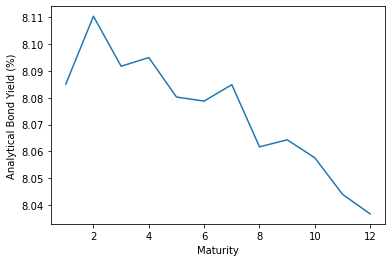

In [8]:
# Caclulating bond yield
y_t = -np.log(zcb_prices/100)/(t/13)
plt.plot(t,y_t*100)
plt.xlabel('Maturity')
plt.ylabel('Analytical Bond Yield (%)')
plt.show()

In [9]:
# Calibrate Intial Interest rate using market bond yield
n_steps = len(t)
del_t = t[1:]-t[:-1]

def libor_rate_cal(x):
    F_0 = x[0]
    mu_j = x[1]
    sigma_j = x[2]
    np.random.seed(0)
    Z = norm.rvs(size=len(del_t))
    F_j = F_0*np.exp((mu_j-sigma**2/2)*del_t + sigma_j*np.sqrt(del_t)*Z)
    return sum(np.abs(F_j-y_t[1:]))

In [10]:
#Minimizing LIBOR forward rate function and calculating the varibale
bnds = ((0,1),(-1,1),(0,1))
opt_val = scipy.optimize.fmin_slsqp(libor_rate_cal,(0.0746,0.001,0.03),bounds=bnds)
F_0 = opt_val[0]
mu_j = opt_val[1]
sigma_j = opt_val[2]
sigmaj = sigma_j

opt.sigma = sigmaj

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.001822967749481652
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 10


In [11]:
# Calculating the model yield
np.random.seed(0)
Z = norm.rvs(size=len(del_t))
# Libor forward yield rates
F_j = F_0*np.exp((mu_j-sigma**2/2)*del_t + sigma_j*np.sqrt(del_t)*Z) 
F_j

array([0.0808475 , 0.08069882, 0.08076186, 0.08089955, 0.08085879,
       0.08054893, 0.08075873, 0.08063877, 0.08064401, 0.08069995,
       0.08067093, 0.08081371])

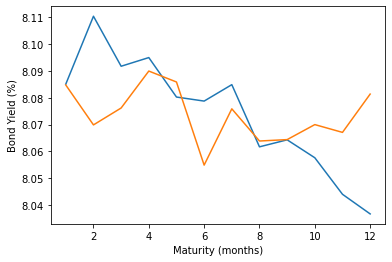

In [12]:
# Caclulating bond yield
plt.plot(t,y_t*100, label = 'Analytical Bond Yield')
plt.plot(t[1:],F_j*100, label = 'Calibrated Bond Yield')
plt.xlabel('Maturity (months)')
plt.ylabel('Bond Yield (%)')
plt.show()

In [13]:
# Applying the algorithms
np.random.seed(0)
n_simulations = 100000
n_steps = len(t)

mc_forward = np.ones([n_simulations,n_steps-1])*(zcb_prices[:-1]-zcb_prices[1:])/(zcb_prices[1:])
predcorr_forward = np.ones([n_simulations,n_steps-1])*(zcb_prices[:-1]-zcb_prices[1:])/(zcb_prices[1:])
predcorr_capfac = np.ones([n_simulations,n_steps])
mc_capfac = np.ones([n_simulations,n_steps])

delta = np.ones([n_simulations,n_steps-1])*(t[1:]-t[:-1])

In [14]:
for i in range(1,n_steps):
    Z = norm.rvs(size = [n_simulations,1])
    
    # Explicit Monte Carlo simulation
    muhat = np.cumsum(delta[:,i:]*mc_forward[:,i:]*sigmaj**2/(1+delta[:,i:]*mc_forward[:,i:]),axis = 1)
    mc_forward[:,i:] = mc_forward[:,i:]*np.exp((muhat-sigmaj**2/2)*delta[:,i:]+sigmaj*np.sqrt(delta[:,i:])*Z)
    
    # Predictor-Corrector Montecarlo simulation
    mu_initial = np.cumsum(delta[:,i:]*predcorr_forward[:,i:]*sigmaj**2/(1+delta[:,i:]*predcorr_forward[:,i:]),axis = 1)
    for_temp = predcorr_forward[:,i:]*np.exp((mu_initial-sigmaj**2/2)*delta[:,i:]+sigmaj*np.sqrt(delta[:,i:])*Z)
    mu_term = np.cumsum(delta[:,i:]*for_temp*sigmaj**2/(1+delta[:,i:]*for_temp),axis = 1)
    predcorr_forward[:,i:] = predcorr_forward[:,i:]*np.exp((mu_initial+mu_term-sigmaj**2)*delta[:,i:]/2+sigmaj*np.sqrt(delta[:,i:])*Z)
    
    

In [15]:
# Implying capitalisation factors from the forward rates
mc_capfac[:,1:] = np.cumprod(1+delta*mc_forward, axis = 1)
predcorr_capfac[:,1:] = np.cumprod(1+delta*predcorr_forward, axis = 1)

# Inverting the capitalisation factors to imply bond prices (discount factors)
mc_price = mc_capfac**(-1)
predcorr_price = predcorr_capfac**(-1)

# Taking averages
mc_final = np.mean(mc_price,axis = 0)
predcorr_final = np.mean(predcorr_price,axis = 0)

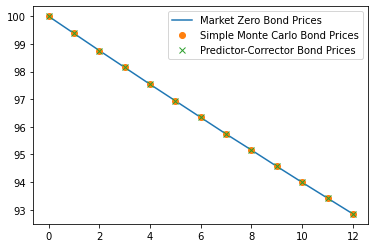

In [16]:
plt.plot(t,zcb_prices, label = "Market Zero Bond Prices")
plt.plot(t,mc_final*100,'o', label = "Simple Monte Carlo Bond Prices")
plt.plot(t,predcorr_final*100,'x', label = "Predictor-Corrector Bond Prices")
plt.legend()
plt.show()

Share price path is given as :


$$S_{t_{i+1}} = S_{t_i} e^{\left( r - \frac{\sigma^2 \left( t_i, t_{i+1} \right)}{2} \right) \, (t_{i+1}-t_i) \, + \, \sigma(t_i,t_{i+1}) \, \sqrt{t_{i+1} - t_i} \, Z}$$

where $S_{t_i}$ is the share price at time $t_i, \sigma(t_i,t_{i+1})$ is the volatility for the period $[t_i,t_{i+1}], r_{t_i}$ is the risk-free interest rate, and $Z \sim N(0,1)$. The counterparty firm values can be simulated similarly.

In [17]:
def share_price(zcb_prices,F_j,sigmaj,del_t):
    np.random.seed(0)
    Z = norm.rvs(size=len(del_t))
    St = zcb_prices[1:]*np.exp((F_j - 0.5*sigmaj**2)*(del_t) + sigmaj*np.sqrt(del_t)*Z)
    return St

In [18]:
opt.model_prices = share_price(zcb_prices,F_j,sigmaj,del_t)

In [19]:
# define number of simulations as per the task
n = 100000

# initialize predictor-corrector Monte Carlo simulation forward rate
predcorr_forward = np.ones([n, opt.N])*(opt.model_prices[:-1]-opt.model_prices[1:])/(opt.del_t*opt.model_prices[1:])
predcorr_capfac = np.ones([n, opt.N+1])
delta = np.ones([n, opt.N])*opt.del_t


In [20]:
# calculate the forward rate for each steps from the bond price
for i in range(1, opt.N):
    # generate random numbers follow normal distribution
    Z = opt.sigma*np.lib.scimath.sqrt(delta[:,i:])*norm.rvs(size = [n,1])

    # predictor-corrector Monte Carlo simulation
    mu_initial = np.cumsum(delta[:,i:]*predcorr_forward[:,i:]*opt.sigma**2/(1+delta[:,i:]*predcorr_forward[:,i:]), axis = 1)
    temp = predcorr_forward[:,i:]*np.exp((mu_initial-opt.sigma**2/2)*delta[:,i:]+Z)
    mu_term = np.cumsum(delta[:,i:]*temp*opt.sigma**2/(1+delta[:,i:]*temp), axis = 1)
    predcorr_forward[:,i:] = predcorr_forward[:,i:]*np.exp((mu_initial + mu_term - opt.sigma**2)*delta[:,i:]/2+Z)

# implying capitalization factors from the forward rates
predcorr_capfac[:,1:] = np.cumprod(1+delta*predcorr_forward,axis = 1)

# inverting the capitalization factors to imply bond prices (discount factors)
predcorr_price = predcorr_capfac**(-1)

# taking averages: Forward Rate, Bond Price, Capitalization Factors
# mean Forward Rate
opt.forward_rate = np.mean(predcorr_forward,axis = 0)

# mean Price 
predcorr_price = np.mean(predcorr_price,axis = 0)

# mean Capitalization Factors
opt.capfac = np.mean(predcorr_capfac,axis = 0)

In [21]:
def simulate(Option, n = 10000, gamma = 0.75):   
    Option.stock = []            # stock mean in each simulation
    Option.stock_sd = []         # stock sd in each simulation
    Option.firm = []             # firm mean in each simulation
    Option.firm_sd = []          # firm sd in each simulation
    Option.stock_prices = []
    Option.firm_prices = []
    Option.bond_prices = []
    stock_price = [Option.S] * n     
    firm_price = [Option.Sf] * n   
    predcorr_capfac = 1 
    
    # Constans calculate outside the loop for optimization
    corr_matrix = np.linalg.cholesky(np.array([[1,Option.c],[Option.c,1]]))
    

    for i in range(Option.N):
        # Saving the stock and firm path
        Option.stock_prices.append(stock_price[:])
        Option.firm_prices.append(firm_price[:])     
        predcorr_forward = (Option.model_prices[i] - Option.model_prices[i+1]) / (Option.del_t*Option.model_prices[i+1])
        mu_1 = 0
        mu_2 = 0
        for j in range(n):
            xi = np.matmul(corr_matrix, norm.rvs(size = 2))

            # local volatilities
            v_dt = Option.sig*(stock_price[j])**(gamma-1)
            vf_dt = Option.vf*(firm_price[j])**(gamma-1)

            # continuously compounded interest rate
            Option.r = np.lib.scimath.log(1+Option.del_t*predcorr_forward)/Option.del_t
            
            # stock price
            stock_price[j] *= np.exp((Option.r-1/2*(v_dt**2))*Option.del_t + 
                                  v_dt*np.lib.scimath.sqrt(Option.del_t)*xi[0])
            # firm price
            firm_price[j] *= np.exp((Option.r-1/2*(vf_dt**2))*Option.del_t + 
                              vf_dt*np.lib.scimath.sqrt(Option.del_t)*xi[1])
         
            # Predictor-Corrector Monte Carlo Simulation
            Z = opt.sigma*np.lib.scimath.sqrt(Option.del_t)*norm.rvs()
            mu_1 += Option.del_t*predcorr_forward*Option.sigma**2/(1+Option.del_t*predcorr_forward)
            temp = predcorr_forward*np.exp((mu_1 - Option.sigma**2/2)*Option.del_t*Z)
            mu_2 += Option.del_t*temp*Option.sigma**2/(1+Option.del_t*temp)
            new_predcorr_forward = predcorr_forward*np.exp((mu_1 + mu_2 - Option.sigma**2)*Option.del_t*0.5 + Z)
        
        # implying capitalization factors from the forward rates
        predcorr_capfac *= 1+Option.del_t*new_predcorr_forward
        
        # inverting the capitalization factors to imply bond prices (discount factors)
        Option.bond_prices.append(predcorr_capfac**(-1)) 
        
        # stock mean and sd in each simulation
        Option.stock.append(np.mean(stock_price))
        Option.stock_sd.append(np.std(stock_price) / np.sqrt(n*Option.N))

        # firm mean and sd in each simulation
        Option.firm.append(np.mean(firm_price))
        Option.firm_sd.append(np.std(firm_price) / np.sqrt(n*Option.N))
        # print(int((i+1)*100./Option.N),"%... ", end ='')
    


In [22]:
# Run Simulation for Stock and Firm price
simulate(opt)

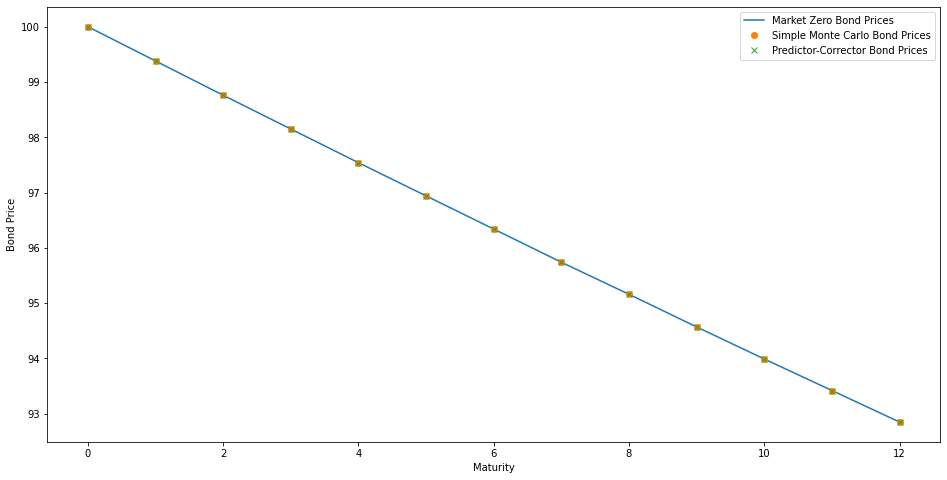

In [23]:
# plot results
plt.subplots(figsize=(16, 8))
plt.xlabel('Maturity')
plt.ylabel('Bond Price')
plt.plot(t,zcb_prices, label = "Market Zero Bond Prices")
plt.plot(t,mc_final*100,'o', label = "Simple Monte Carlo Bond Prices")
plt.plot(t,predcorr_final*100,'x', label = "Predictor-Corrector Bond Prices")
plt.legend()
plt.show()

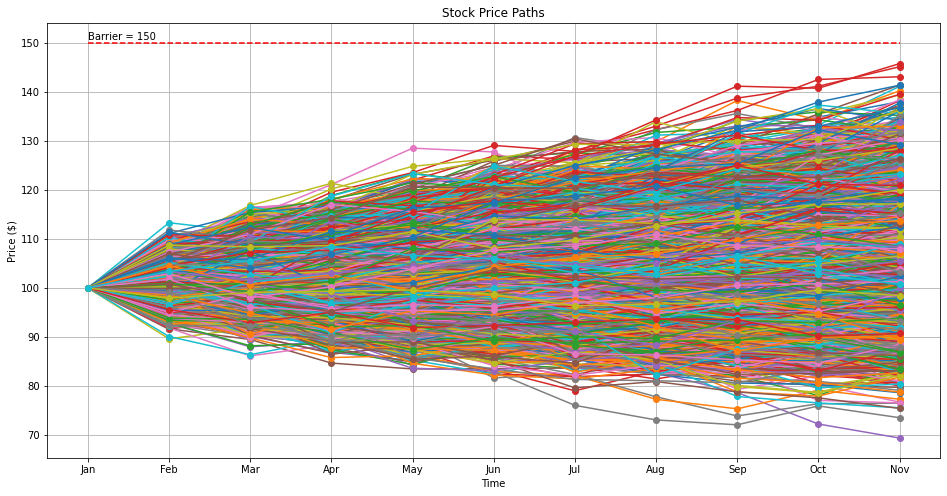

In [24]:
"""Plot stock simulations"""
dates = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
plt.subplots(figsize=(16, 8))
plt.plot([opt.H]*len(dates), linestyle='--', color ='r')
paths = pd.DataFrame(np.transpose(opt.stock_prices), columns = dates)
for index, row in paths.iterrows():
    plt.plot(row, marker='o')
plt.figtext(0.16,0.85,'Barrier = '+ str(opt.H))
plt.title('Stock Price Paths')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

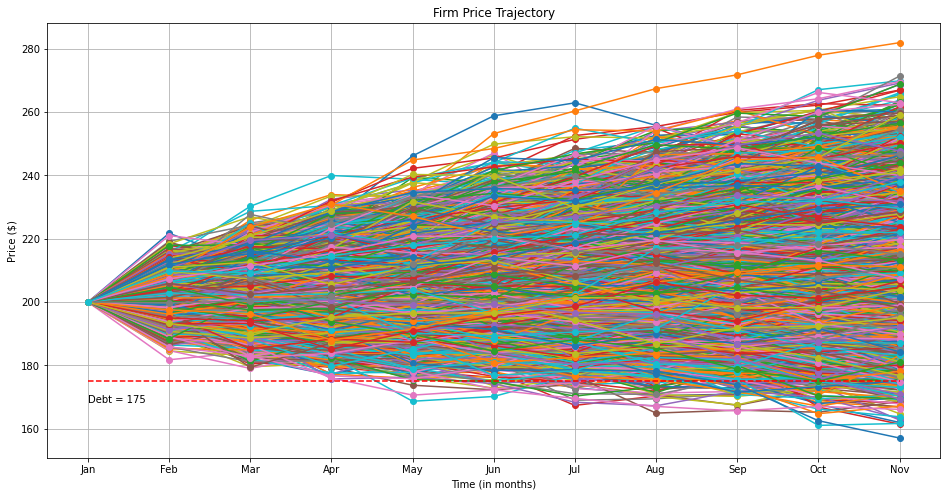

In [25]:
"""Plot firm simulations"""
plt.subplots(figsize=(16, 8))
paths = pd.DataFrame(np.transpose(opt.firm_prices), columns = dates)
for index, row in paths.iterrows():
    plt.plot(row, marker='o')

plt.plot([opt.Debt]*len(dates), linestyle='--', color ='r')
plt.figtext(0.16,0.22,'Debt = '+ str(opt.Debt))
plt.title('Firm Price Trajectory')
plt.xlabel('Time (in months)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show() 

# Question 2

Calculate the one-year discount factor which applies for each simulation, and use this to find first the value of the option for the jointly simulated stock and firm paths with no default risk, and then the value of the option with counterparty default risk. (Hint: you may want to use the reshape and ravel attributes of numpy arrays to ensure your dimensions match correctly).

In [32]:
# Option Parameters
S= 100              # Intial Stock price
v0=200              # Firm price
K= 100              # Strike price
H = 150             # Barrier level
Time= 1             # Maturity in years
cur_time = 0
r=0.08              # Risk-free rate
b=0.08
sigma=0.3           # Annualized stock volatility
sig = 0.3

#Counterparty firm paramenters 
Sf=200              # Intial asset price
vf=0.3              # Volatility
sigma_firm=0.25     # Annualized firm volatility
Debt=175            # debt
c = 0.2             # Correlation btw stock and firm
rr=0.25             # recovery rate
gamma = 0.75        # gamma of the local volatility

R = 0               # value upon expiration
N = 11              # simulation months
# Bond
bond_maturities = np.array(range(0,13,1)) / 12
bond_prices = np.array([100,99.38,98.76,98.15,97.54,96.94,96.34,95.74,95.16,94.57,93.99,93.42,92.85])

In [33]:
# Simulation Parameters
n_simulation = 100000
n_steps= 12 # 12 months to simulate
dt = Time/n_steps

# Volatility model parameters
sigmaT_stock = sigma
sigmaT_company = sigma_firm
gamma = 0.75
c = 0.2

# Stock and Firm initialization
sT = [S]*n_simulation
VT = [v0]*n_simulation
out = [False]*n_simulation

# Initialization for LIBOR model
predcorr_forward = np.ones([n_simulation,n_steps])* (bond_prices[:-1]-bond_prices[1:])/(2*bond_prices[1:])
delta = np.ones([n_simulation,n_steps])*(bond_maturities[1:]-bond_maturities[:-1])

# Stock, company, and interest rate path matrices
share_paths = np.zeros([n_simulation,n_steps])
firm_value_paths = np.zeros([n_simulation,n_steps])
r_paths = np.zeros([n_simulation,n_steps])

In [46]:
def sigma_step(sigma, value, gamma):
    return sigma*np.power(value,(gamma - 1))

def value_step(rT,sigmaT,Z,dT):
    return np.exp((rT-0.5*sigmaT**2)*dT+sigmaT*Z*np.sqrt(dT))

In [47]:
for i in range(0,int(n_steps)):
    
    # stock and company sigma
    sigmaT_stock = sigma_step(sigma,sT,gamma)
    sigmaT_company = sigma_step(sigma_firm,VT,gamma)

    #  Brownian motion for the stock and company
    corr_matrix = np.array([[1,c],[c,1]])
    norm_matrix = norm.rvs(size = np.array([2,n_simulation]))
    corr_norm_matrix = np.matmul(np.linalg.cholesky(corr_matrix), norm_matrix)

    stock_Z = corr_norm_matrix[0,]
    firm_Z = corr_norm_matrix[1,]

    
    sT *= value_step(r,sigmaT_stock,stock_Z, dt)
    VT *= value_step(r,sigmaT_company,firm_Z, dt)
    
    share_paths[:,i] = sT
    firm_value_paths[:,i] = VT
    r_paths[:,i] = r

In [57]:
# CVA functions
def terminal_value (S_0, r, sigma, z, Time):
    return S_0*np.exp((r-sigma**2/2)*Time + sigma*np.sqrt(Time)*z)

def discounted_call_payoff(S_T, K, D): 
    return D*np.maximum(S_T - K, 0)

def call_payoff(S_T, K):
    return np.maximum(S_T - K,0)

def discount_factor_calculation(r_year, dT):
    annual_interest_rate = np.prod(r_year + 1, axis=1)
    return 1/annual_interest_rate

In [58]:
# The discount factor based on interest rate paths
discount_factor = discount_factor_calculation(r_paths, dt)
print(discount_factor)

[0.39711376 0.39711376 0.39711376 ... 0.39711376 0.39711376 0.39711376]


In [63]:
# Barrier Call Option with No Default Risk

out = np.where(sT >= H, True , np.where(out, True, False))


barrier_calldist_final = np.where(out, 0, discounted_call_payoff(sT, K, discount_factor))
barrier_call_no_default_total = np.sum(barrier_calldist_final)
barrier_call_no_default = barrier_call_no_default_total / n_simulation
print(barrier_call_no_default)

6.6558663043659205


In [65]:
# CVA adjustment
barrier_call_value = np.where(out, 0, call_payoff(sT,K))
term_firm_value = terminal_value(VT, r, sigma_firm, corr_norm_matrix[0,], Time)
amount_lost = discount_factor*(1-rr)*(term_firm_value < Debt)*barrier_call_value

discount_barrier_call_adj_final = discount_barrier_call_final - amount_lost
discount_barrier_call_adj_total = np.sum(discount_barrier_call_adj_final)
discount_barrier_call_adj = discount_barrier_call_adj_total / n_simulation
print(discount_barrier_call_adj)

6.2812546609275755


# Question 3

#### 3 If you bought the option (rather than sold it), how does your own credit risk affect the value of the option?

The option price will be based on the risk of counterparty default. i.e. the price of an option that includes the risk of counterparty default.

# Question 4

#### 4. Suppose interest rates increased 25 basis points. What is the new value of your option?

In [82]:
# base on the question, we only need to add 0.25 to our recovery rate making 0.5.

H=np.zeros([n_simulation,n_steps])
CVA=np.zeros([n_steps-1])
CVA_std=np.zeros([n_steps-1])
default_Free_Value=np.zeros([n_steps-1])
With_default_Value=np.zeros([n_steps-1])




#Value
for i in range (n_steps-1):
    amount_Lost=(1-0.5)*H[:,i]*(firm_value_paths[:,i]<Debt) #The expression VT <debt gives 1 if true and 0 otherwise
    CVA[i]=amount_Lost.mean()
    CVA_std[i]=amount_Lost.std()/np.sqrt(n_simulation)
    default_Free_Value[i]=np.mean(H[:,i])
    With_default_Value[i]=default_Free_Value[i]-CVA[i]

In [81]:
With_Default_Value[i]

0.0